# Seminar 3

Titanic again! (`train.csv` file from https://www.kaggle.com/c/titanic/data?select=train.csv)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


df = pd.read_csv('train.csv')
df.sample(4)

In [ ]:
#Sample 99 times 1 and 1 time 1000
sample = np.ones(100)
sample[0] = 1000

# Outliers

Outlier is a data point that stands out a lot from the other data points in a set.

Possible causes:
*   Variability of data
*   Novel data
*   Errors

Examples:

* The average height of a giraffe is $\sim16$ feet tall. There are 2 giraffes that are 9 and 8.5 feet tall.
* T-shirts usually cost from 10 \\$ to 1 000 \\$, one T-shirt costs 1 000 000 \\$ because it is a luxury item created by a famous designer.
* The age of a student is 1020 years. They made a mistake while filling the year of birth in the form:  typed 1004 instead of 2004.



In [ ]:
#on histogram we have 1 tall bar and 1 really short one
plt.hist(sample)
plt.show()

There are 2 ways to spot outliers:


*   1.5IQR
*   std; 2std; 3std



## 1.5IQR

Outliers are points below $Q1-1.5IQR$ and above $Q3+1.5IQR$

Here a boxplot may be useful:
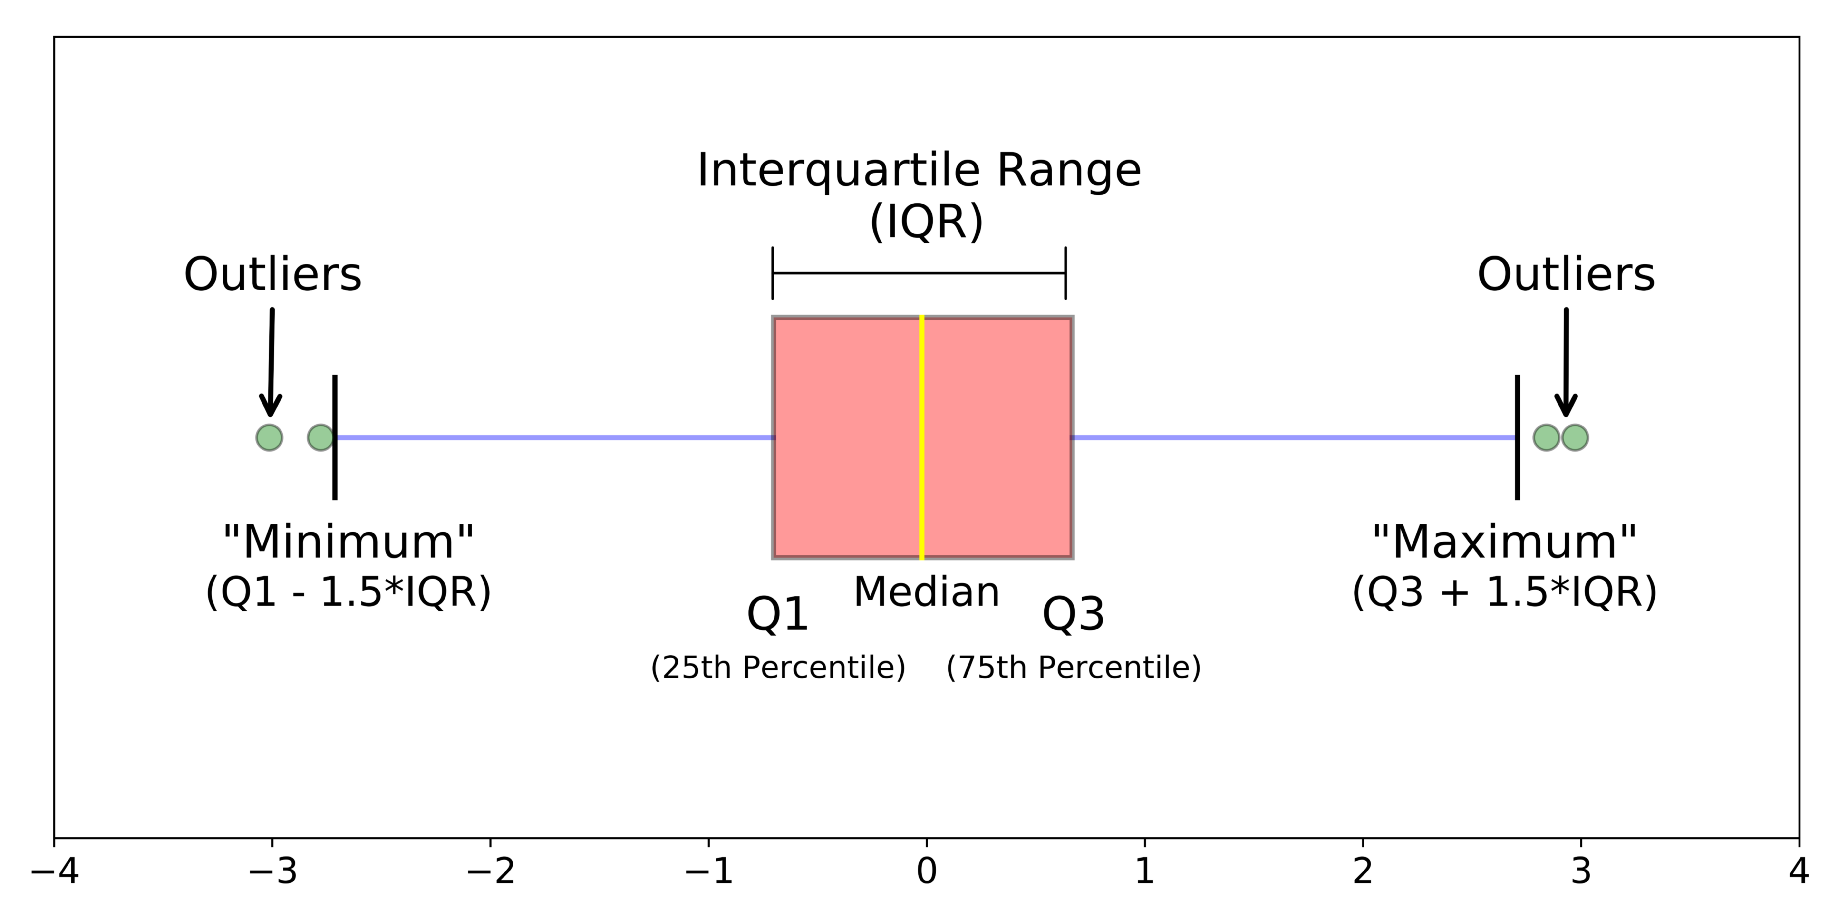

In [ ]:
plt.boxplot(df['Age'].dropna(), vert=False)
plt.show()

In [ ]:
sns.boxplot(df, x='Age')

In [ ]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1

low_iqr = q1 - iqr * 1.5
up_iqr = q3 + iqr * 1.5

low_iqr, up_iqr

**Task:**

Filter the objects, that are outliers

In [ ]:
#your code here

## std; 2std; 3std

If we have a normal distribution with  $μ=0$  and variance  $σ^2$ and we will generate observetions from it:

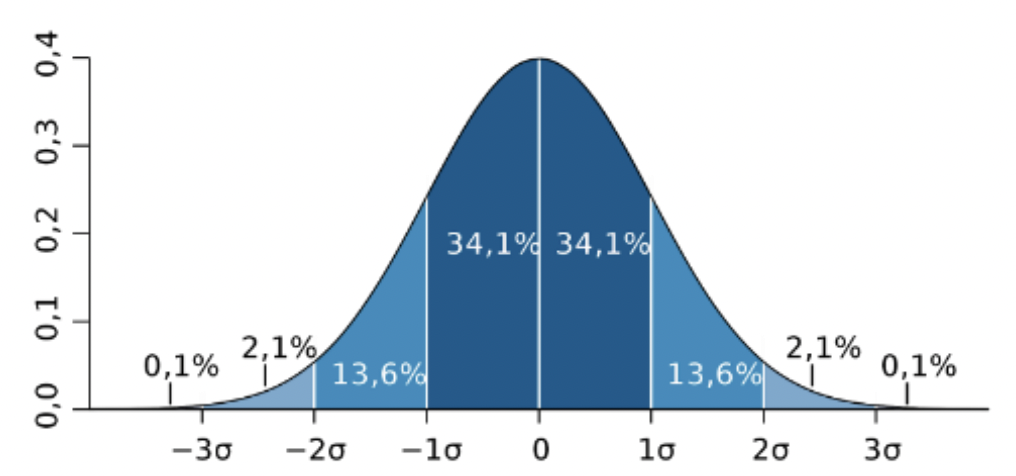

So, if the distribution is normal:



*   We consider 1std: NOT outliers are 68.2\% of data near center ($\mu$)
*   We consider 2std: NOT outliers are 95.5\% of data near center ($\mu$)
*   We consider 3std: NOT outliers are 99.7\% of data near center ($\mu$)



In [ ]:
mu = df['Age'].mean()
mu

In [ ]:
std = df['Age'].std()
std

In [ ]:
low_1s = mu - 1 * std
up_1s = mu + 1 * std

low_2s = mu - 2 * std
up_2s = mu + 2 * std

low_3s = mu - 3 * std
up_3s = mu + 3 * std

low_2s, up_2s

In [ ]:
#Histogram of Age
plt.hist(df['Age'], bins=20)


plt.axvline(low_2s, linestyle='--', c='blue',   label='low')
plt.axvline(up_2s,  linestyle='--', c='red',    label='up')


plt.legend(loc='upper right')
plt.show()

**Task:**

Filter the objects, that are outliers

In [ ]:
#your code here

## Comparison

In [ ]:
#Histogram of Age
plt.hist(df['Age'], bins=20)


plt.axvline(low_1s, linestyle='--', c='red',   label='1std')
plt.axvline(up_1s,  linestyle='--', c='red')


plt.axvline(low_2s, linestyle='--', c='orange',   label='2std')
plt.axvline(up_2s,  linestyle='--', c='orange')

plt.axvline(low_3s, linestyle='--', c='green',   label='3std')
plt.axvline(up_3s,  linestyle='--', c='green')


plt.axvline(low_iqr, linestyle='--', c='black',   label='1.5IQR')
plt.axvline(up_iqr,  linestyle='--', c='black')


plt.legend(loc='upper right')
plt.show()

# Missing values

We can check, which columns have missing values (`NaN`)

In [ ]:
df.isna().sum()

Sorted for easier work:

In [ ]:
df.isna().sum().sort_values(ascending=False)

Why missing data is a problem?

*   Reduce sample size
*   Introduce bias
*   Impossible to apply machine learning techniques

Why data may be missing?

*   Errors
*   Non-response (privacy concerns, conditional missingness)
*   Nature of the variable

Examples:

*   Technical issues
*   Questions in the form: "Your patronymic", "Your middle name", follow-up questions like "If you answered 'yes' in the previous question, write down your e-mail"
*   Variable PREVIOUS_CARD_NUM_UTILIZED: the number of already recycled cards (if empty - 0)







Possible ways to tackle:


*   Fill the missing values - the usual approach
*   Delete the feature if there are a lot of (usually $> 40\%$) missing values. (Need to be cautious, need to check the nature of the missing data, may limit ourselves)
*   Delete the samples with missing values (if there is a lot of data)




In [ ]:
df.isna().mean().sort_values(ascending=False)

`Cabin` seems to be missing 77\% data. We need to investigate, why. Maybe, there were no cabins in particular class? Or the cabins were not assigned and it is unknown who chose which?

Let's drop this column for now.

In [ ]:
df.drop('Cabin', axis=1, inplace=True)

Let's work with `Embarked` and `Age`. There are not many missing values, let's fill them.


What can we use:


*   Measures of Central Tendency for the whole sample
*   Measures of Central Tendency for the group
*   Random element



For `Age` we can use mean, median or mode. Let's use median.

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].median())

`Embarked` is not numaric, so we can use only mode

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

Let's check if there are any missing values now

In [ ]:
df.isna().sum().sort_values(ascending=False)

When we investigated the measures of central tendency for `Age` we ignored `NaN` values.

It is better to fill missing values afterwards, because we may get some strange results. Let's look into the histogram of `Age` again.

What is going on?

In [ ]:
sns.histplot(df, x='Age')

# Quantiles, Percentiles

We used quartiles (0.25, 0.5, 0.75 quantiles)

In [ ]:
df['Fare'].quantile(0.95)

In [ ]:
np.percentile(df['Fare'], 95)

In [ ]:
np.quantile(df['Fare'], 0.95)

**Task**

Compute the number and the proportion of the passengers who have Fare more than the 95-percentile. Does it agree with the theory?

In [ ]:
#YOUR CODE

# Z-score

In [ ]:
from scipy.stats import zscore

z_scores_age = zscore(df['Age'][df['Age'].notna()])
z_scores_age

In [ ]:
zscore(sample)

**Task**

Choose the person with the most extreme age.

In [ ]:
#YOUR CODE

We can recompute measures of central tendency. What can be said about them?

In [ ]:
z_scores_age.mean()

In [ ]:
z_scores_age.median()

In [ ]:
z_scores_age.mode()

Measures of variability/spread. What can you notice?

In [ ]:
z_scores_age.max() - z_scores_age.min()

In [ ]:
np.quantile(z_scores_age, 0.25), np.quantile(z_scores_age, 0.5), np.quantile(z_scores_age, 0.75)

In [ ]:
z_scores_age.quantile(0.75)-z_scores_age.quantile(0.25)

In [ ]:
z_scores_age.var()

In [ ]:
z_scores_age.std()

Why is it useful?

How did the distribution changed?

In [ ]:
sns.histplot(df['Age'])

In [ ]:
sns.histplot(z_scores_age)

We actualy can try comparing different features? distributions:

The age 80 is an outlier. And Fare 512, too. Which one is "worse"?

Are distribution of Age and Fare similar?

In [ ]:
df['Age'].max(), df['Fare'].max()

We may try to compare them on one plot, but the scales are vastly different.

In [ ]:
sns.histplot(df['Age'], label='Age')
sns.histplot(df['Fare'], label='Fare')

In [ ]:
z_scores_fare = zscore(df['Fare'])

sns.histplot(z_scores_age, label='Age')
sns.histplot(z_scores_fare, label='Fare')

Let's check the outliers.

**Task**

Choose the Z score (age) for the people of age 80. And Z score (fare) for people who paid 512.3292

In [ ]:
#YOUR CODE